In [13]:
from fNeuro.behavioural.data_functions import load_data, long_form_df
import pandas as pd
import statsmodels.formula.api as smf
import ptitprince as pt
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')
import statsmodels.api as sm
import scipy.stats as stats
from IPython.display import display
import numpy as np
import pingouin as pin
import warnings
warnings.filterwarnings("ignore")
from statsmodels.stats import sandwich_covariance

## Read in the data

In [14]:
neuroimaging_measures = load_data('BEACON', 'neuroimaging_behavioural_measures')
measures = {
    'BMI': long_form_df(neuroimaging_measures[['t1','bmi_t1', 'bmi_t2']], 'bmi_t1', 'bmi_t2', 'BMI').drop(index=[164, 165]).reset_index(drop=True),
    'age': long_form_df(neuroimaging_measures[['t1','age_t1', 'age_t2']], 'age_t1', 'age_t2', 'age').drop(index=[164, 165]).reset_index(drop=True),
    'depression': long_form_df(neuroimaging_measures[['t1','depression_t1', 'depression_t2']], 'depression_t1' ,'depression_t2', 'depression').drop(index=[164, 165]).reset_index(drop=True),
    'anxiety': long_form_df(neuroimaging_measures[['t1','anxiety_t1', 'anxiety_t2']], 'anxiety_t1' ,'anxiety_t2', 'anxiety').drop(index=[164, 165]).reset_index(drop=True),
    'edeq_global': long_form_df(neuroimaging_measures[['t1','edeq_global_score_t1', 'edeq_global_score_t2']], 
                            'edeq_global_score_t1' ,'edeq_global_score_t2', 'edeq_global').drop(index=[164, 165]).reset_index(drop=True),
}

In [15]:
import os
if 'neuroimaging_behavioural_measures.csv' not in os.listdir():
    neuroimaging_measures.to_csv('neuroimaging_behavioural_measures.csv')

## Build the models

In [16]:
lmm_models = dict(list(zip([measure for measure in measures], [{} for measure in measures])))
for measure in measures:
    model = smf.mixedlm(f'{measure} ~ group + time_point + group:time_point', groups='subject', data=measures[measure].dropna()).fit()
    lmm_models[measure] = model

## Age

NormaltestResult(statistic=3.6373812637347958, pvalue=0.16223804124156638)

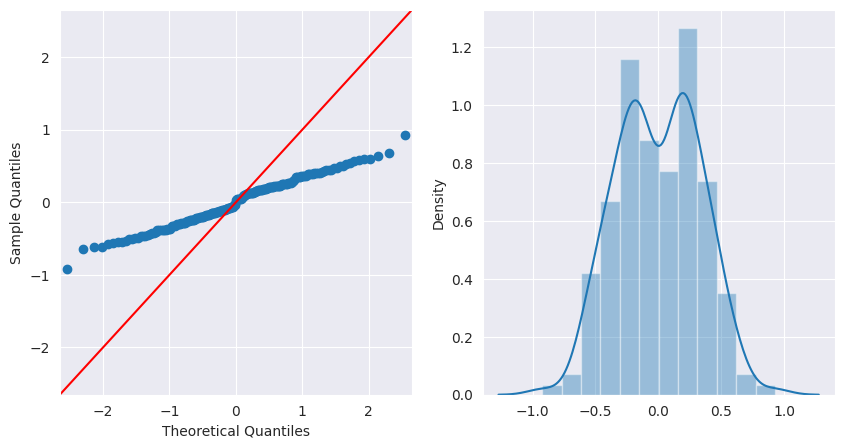

<class 'statsmodels.iolib.summary2.Summary'>
"""
                 Mixed Linear Model Regression Results
========================================================================
Model:                   MixedLM      Dependent Variable:      age      
No. Observations:        184          Method:                  REML     
No. Groups:              92           Scale:                   0.2166   
Min. group size:         2            Log-Likelihood:          -334.1073
Max. group size:         2            Converged:               Yes      
Mean group size:         2.0                                            
------------------------------------------------------------------------
                              Coef.  Std.Err.   z    P>|z| [0.025 0.975]
------------------------------------------------------------------------
Intercept                     18.815    0.648 29.021 0.000 17.544 20.086
group[T.pAN]                   0.001    0.771  0.001 0.999 -1.511  1.512
time_point[T.t2]               3.100    0.127 24.473 0.000  2.851  3.348
group[T.pAN]:time_point[T.t2] -0.292    0.151 -1.937 0.053 -0.587  0.003
subject Var                   11.132    5.092                           
========================================================================

"""

<AxesSubplot: xlabel='time_point', ylabel='age'>

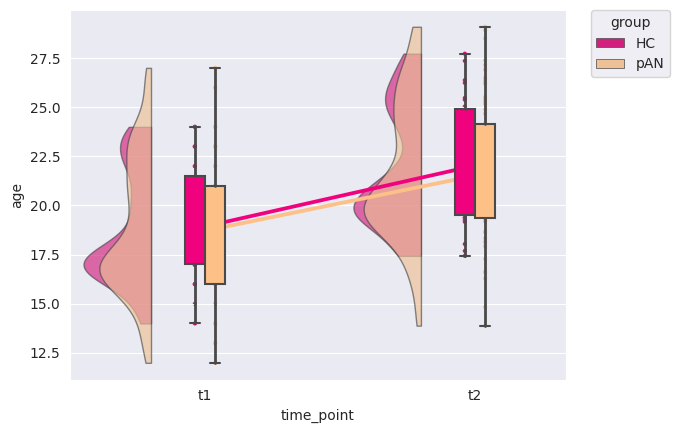

In [17]:
lmm_models['age']
display(stats.normaltest(lmm_models['age'].resid))
fig, ax = plt.subplots(1, 2,figsize=(10, 5))
fig = sm.qqplot(lmm_models['age'].resid, line='45', ax=ax[0])
sns.distplot(lmm_models['age'].resid, ax=ax[1])
plt.show()
display(lmm_models['age'].summary())
pt.RainCloud(
            x="time_point", 
            y='age', 
            hue="group", 
            data=measures['age'], 
            palette='Accent_r', 
            alpha=.65, 
            dodge=True, 
            scale="area",
            width_viol=.5,
            jitter=0,
            pointplot = True,
            bw=.3,
            
             )

## BMI

NormaltestResult(statistic=3.2688813221610364, pvalue=0.19506144624998417)

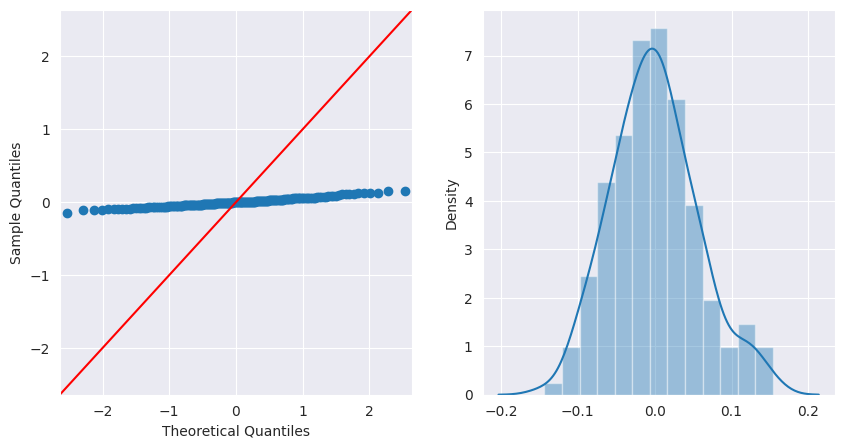

<class 'statsmodels.iolib.summary2.Summary'>
"""
                 Mixed Linear Model Regression Results
========================================================================
Model:                   MixedLM      Dependent Variable:      trans_BMI
No. Observations:        179          Method:                  REML     
No. Groups:              92           Scale:                   0.0038   
Min. group size:         1            Log-Likelihood:          213.3819 
Max. group size:         2            Converged:               Yes      
Mean group size:         1.9                                            
------------------------------------------------------------------------
                              Coef.  Std.Err.   z    P>|z| [0.025 0.975]
------------------------------------------------------------------------
Intercept                      1.351    0.014 97.546 0.000  1.324  1.378
group[T.pAN]                  -0.097    0.016 -5.963 0.000 -0.129 -0.065
time_point[T.t2]               0.034    0.017  1.947 0.052 -0.000  0.068
group[T.pAN]:time_point[T.t2] -0.005    0.021 -0.232 0.817 -0.045  0.035
subject Var                    0.001    0.010                           
========================================================================

"""

<AxesSubplot: xlabel='time_point', ylabel='BMI'>

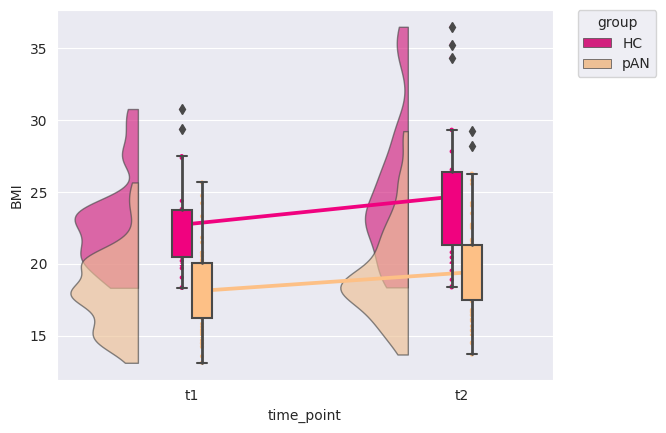

In [18]:
measures['BMI']['trans_BMI'] = np.log10(measures['BMI']['BMI'])
lmm_models['BMI'] = smf.mixedlm(f'trans_BMI ~ group + time_point + group:time_point', groups='subject', data=measures['BMI'].dropna()).fit()#cov_pen=sandwich_covariance)
display(stats.normaltest(lmm_models['BMI'].resid))
fig, ax = plt.subplots(1, 2,figsize=(10, 5))
fig = sm.qqplot(lmm_models['BMI'].resid, line='45', ax=ax[0])
sns.distplot(lmm_models['BMI'].resid, ax=ax[1])
plt.show()
display(lmm_models['BMI'].summary())
pt.RainCloud(
            x="time_point", 
            y='BMI', 
            hue="group", 
            data=measures['BMI'], 
            palette='Accent_r', 
            alpha=.65, 
            dodge=True, 
            scale="area",
            width_viol=.5,
            jitter=0,
            pointplot = True,
            bw=.3,
            
             )

## HADS Depression

NormaltestResult(statistic=3.7008553491700877, pvalue=0.1571699343514965)

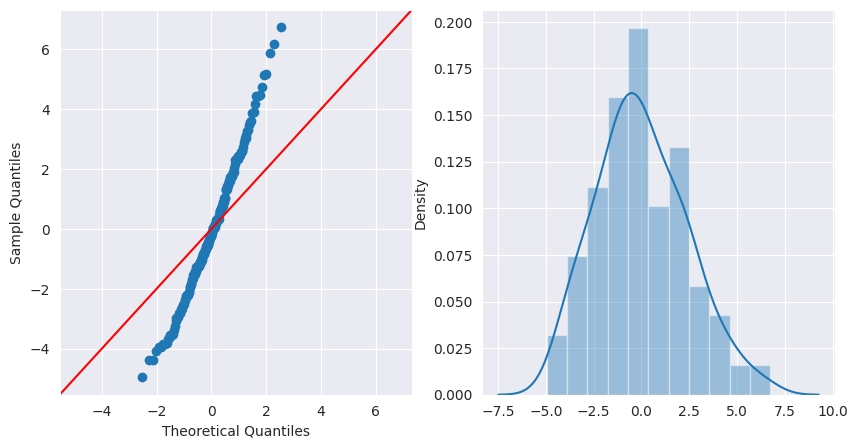

<class 'statsmodels.iolib.summary2.Summary'>
"""
                 Mixed Linear Model Regression Results
========================================================================
Model:                  MixedLM      Dependent Variable:      depression
No. Observations:       177          Method:                  REML      
No. Groups:             92           Scale:                   8.0574    
Min. group size:        1            Log-Likelihood:          -470.6330 
Max. group size:        2            Converged:               Yes       
Mean group size:        1.9                                             
------------------------------------------------------------------------
                              Coef.  Std.Err.   z    P>|z| [0.025 0.975]
------------------------------------------------------------------------
Intercept                      2.970    0.718  4.134 0.000  1.562  4.378
group[T.pAN]                   4.457    0.857  5.198 0.000  2.776  6.137
time_point[T.t2]              -0.008    0.793 -0.010 0.992 -1.563  1.548
group[T.pAN]:time_point[T.t2] -0.697    0.944 -0.738 0.461 -2.547  1.154
subject Var                    5.441    0.714                           
========================================================================

"""

<AxesSubplot: xlabel='time_point', ylabel='depression'>

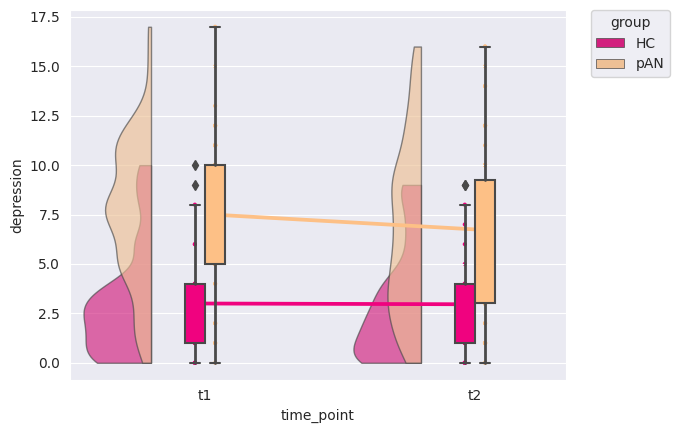

In [19]:
lmm_models['depression']
display(stats.normaltest(lmm_models['depression'].resid))
fig, ax = plt.subplots(1, 2,figsize=(10, 5))
fig = sm.qqplot(lmm_models['depression'].resid, line='45', ax=ax[0])
sns.distplot(lmm_models['depression'].resid, ax=ax[1])
plt.show()
display(lmm_models['depression'].summary())
pt.RainCloud(
            x="time_point", 
            y='depression', 
            hue="group", 
            data=measures['depression'], 
            palette='Accent_r', 
            alpha=.65, 
            dodge=True, 
            scale="area",
            width_viol=.5,
            jitter=0,
            pointplot = True,
            bw=.3,
            
             )

## HADS Anxiety

NormaltestResult(statistic=2.9476148311714443, pvalue=0.2290517277452484)

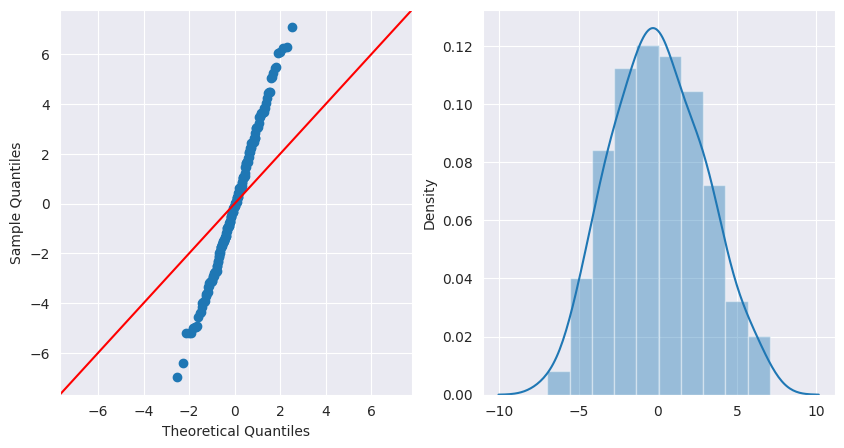

<class 'statsmodels.iolib.summary2.Summary'>
"""
                Mixed Linear Model Regression Results
======================================================================
Model:                 MixedLM      Dependent Variable:      anxiety  
No. Observations:      177          Method:                  REML     
No. Groups:            92           Scale:                   10.6229  
Min. group size:       1            Log-Likelihood:          -479.1245
Max. group size:       2            Converged:               Yes      
Mean group size:       1.9                                            
----------------------------------------------------------------------
                              Coef. Std.Err.   z   P>|z| [0.025 0.975]
----------------------------------------------------------------------
Intercept                     4.941    0.735 6.718 0.000  3.499  6.382
group[T.pAN]                  5.411    0.878 6.162 0.000  3.690  7.132
time_point[T.t2]              1.233    0.908 1.357 0.175 -0.547  3.013
group[T.pAN]:time_point[T.t2] 0.214    1.081 0.198 0.843 -1.904  2.333
subject Var                   3.470    0.583                          
======================================================================

"""

<AxesSubplot: xlabel='time_point', ylabel='anxiety'>

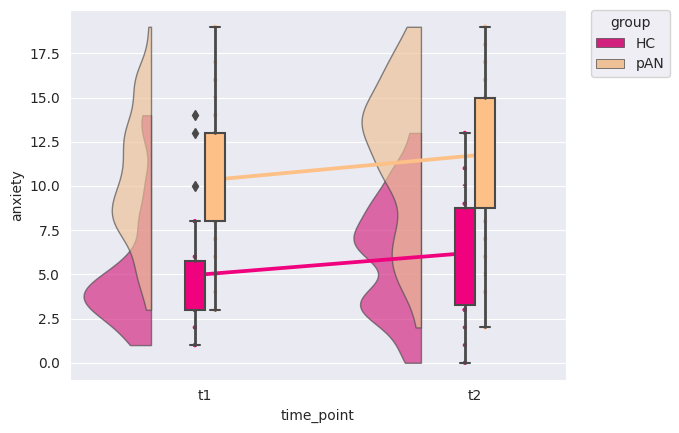

In [20]:
lmm_models['anxiety']
display(stats.normaltest(lmm_models['anxiety'].resid))
fig, ax = plt.subplots(1, 2,figsize=(10, 5))
fig = sm.qqplot(lmm_models['anxiety'].resid, line='45', ax=ax[0])
sns.distplot(lmm_models['anxiety'].resid, ax=ax[1])
plt.show()
display(lmm_models['anxiety'].summary())
pt.RainCloud(
            x="time_point", 
            y='anxiety', 
            hue="group", 
            data=measures['anxiety'], 
            palette='Accent_r', 
            alpha=.65, 
            dodge=True, 
            scale="area",
            width_viol=.5,
            jitter=0,
            pointplot = True,
            bw=.3,
            
             )

## edeq_global

NormaltestResult(statistic=1.9872640079716815, pvalue=0.37022957085299224)

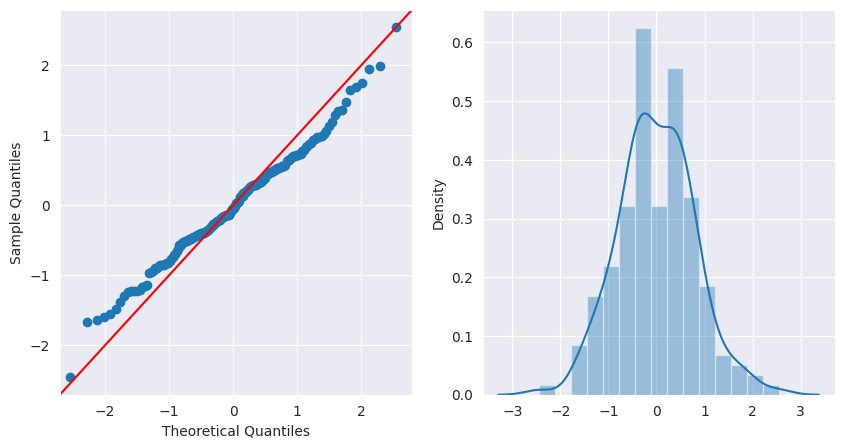

<class 'statsmodels.iolib.summary2.Summary'>
"""
                 Mixed Linear Model Regression Results
========================================================================
Model:                 MixedLM      Dependent Variable:      edeq_global
No. Observations:      178          Method:                  REML       
No. Groups:            92           Scale:                   0.9698     
Min. group size:       1            Log-Likelihood:          -303.2133  
Max. group size:       2            Converged:               Yes        
Mean group size:       1.9                                              
------------------------------------------------------------------------
                              Coef.  Std.Err.   z    P>|z| [0.025 0.975]
------------------------------------------------------------------------
Intercept                      0.831    0.280  2.971 0.003  0.283  1.379
group[T.pAN]                   2.384    0.333  7.156 0.000  1.731  3.036
time_point[T.t2]               0.098    0.276  0.354 0.724 -0.443  0.638
group[T.pAN]:time_point[T.t2] -0.746    0.328 -2.274 0.023 -1.388 -0.103
subject Var                    1.085    0.345                           
========================================================================

"""

<AxesSubplot: xlabel='time_point', ylabel='edeq_global'>

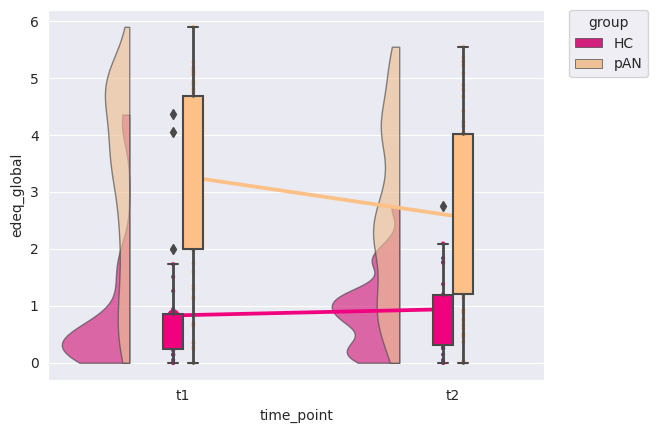

In [21]:
lmm_models['edeq_global']
display(stats.normaltest(lmm_models['edeq_global'].resid))
fig, ax = plt.subplots(1, 2,figsize=(10, 5))
fig = sm.qqplot(lmm_models['edeq_global'].resid, line='45', ax=ax[0])
sns.distplot(lmm_models['edeq_global'].resid, ax=ax[1])
plt.show()
display(lmm_models['edeq_global'].summary())
pt.RainCloud(
            x="time_point", 
            y='edeq_global', 
            hue="group", 
            data=measures['edeq_global'], 
            palette='Accent_r', 
            alpha=.65, 
            dodge=True, 
            scale="area",
            width_viol=.5,
            jitter=0,
            pointplot = True,
            bw=.3,
            
             )

## Time

,U-val,alternative,p-val,RBC,CLES
MWU,1097.5,two-sided,0.059814,-0.250712,0.625356


<AxesSubplot: xlabel='group', ylabel='years'>

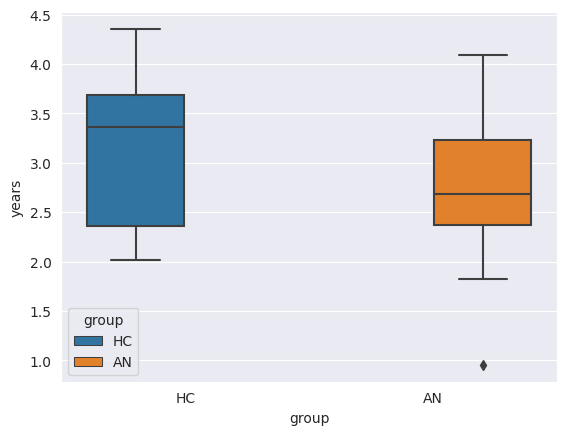

In [22]:
time = neuroimaging_measures[['t1', 'years']].drop(index=76).reset_index(drop=True)
hc_time = time[time['t1'].str.contains('G1')]
an_time = time[time['t1'].str.contains('G2')]
display(pin.mwu(hc_time['years'], an_time['years']))
hc_time['group'] = 'HC'
an_time['group'] = 'AN'
combined = pd.concat((hc_time, an_time))
sns.boxplot(y='years', 
            x='group', hue='group', data=combined)

## Descriptions of dataframe

In [23]:
an = neuroimaging_measures[neuroimaging_measures['t1'].str.contains('G2')]
hc = neuroimaging_measures[neuroimaging_measures['t1'].str.contains('G1')]

In [24]:
an[['edeq_global_score_t1', 'edeq_global_score_t2',
    'anxiety_t1', 'anxiety_t2', 'depression_t1', 'depression_t2',	
    'bmi_t1', 'bmi_t2', 'years', 'age_t1', 'age_t2']].describe()

,edeq_global_score_t1,edeq_global_score_t2,anxiety_t1,anxiety_t2,depression_t1,depression_t2,bmi_t1,bmi_t2,years,age_t1,age_t2
count,63.000000,65.000000,62.000000,65.000000,62.000000,65.000000,66.000000,63.000000,66.000000,66.000000,66.000000
mean,3.257897,2.551923,10.370968,11.784615,7.645161,6.815385,18.095892,19.433397,2.794401,18.878788,21.673189
std,1.629380,1.530417,3.563172,4.185139,3.789964,4.326128,2.711164,3.299250,0.624661,3.488509,3.509639
min,0.000000,0.000000,3.000000,2.000000,0.000000,0.000000,13.109410,13.686167,0.952792,12.000000,13.889156
25%,2.035000,1.206250,8.000000,9.000000,5.000000,3.000000,16.154545,17.498954,2.371027,16.250000,19.382801
50%,3.660000,2.343750,10.000000,13.000000,8.000000,7.000000,17.939875,18.678890,2.676304,18.000000,20.979825
75%,4.671875,4.025000,13.000000,15.000000,10.000000,10.000000,20.018424,21.260209,3.230076,21.750000,24.544325
max,5.900000,5.550000,19.000000,19.000000,17.000000,16.000000,25.664367,29.235048,4.088858,27.000000,29.089731


In [25]:
hc[['edeq_global_score_t1', 'edeq_global_score_t2',
    'anxiety_t1', 'anxiety_t2', 'depression_t1', 'depression_t2',	
    'bmi_t1', 'bmi_t2', 'years', 'age_t1', 'age_t2']].describe()

,edeq_global_score_t1,edeq_global_score_t2,anxiety_t1,anxiety_t2,depression_t1,depression_t2,bmi_t1,bmi_t2,years,age_t1,age_t2
count,26.000000,26.000000,26.000000,26.000000,26.0,26.000000,25.000000,27.000000,27.000000,27.000000,27.000000
mean,0.831538,0.938462,4.961538,6.192308,3.0,2.961538,22.719564,24.664169,3.099729,18.814815,21.914544
std,1.124088,0.699014,3.267792,3.334897,2.8,2.849291,3.247691,4.922717,0.744107,2.935683,3.132168
min,0.000000,0.000000,1.000000,0.000000,0.0,0.000000,18.328742,18.359375,2.015100,14.000000,17.438811
25%,0.235000,0.318750,3.000000,3.250000,1.0,1.000000,20.482476,21.293444,2.361445,17.000000,19.502447
50%,0.405000,0.878125,4.000000,6.500000,2.5,2.000000,22.418935,23.373104,3.358324,18.000000,21.015100
75%,0.855000,1.190625,5.750000,8.750000,4.0,4.000000,23.722811,26.381234,3.682363,21.500000,24.910124
max,4.360000,2.750000,14.000000,13.000000,10.0,9.000000,30.777449,36.503032,4.356010,24.000000,27.722563
